# Dataset --> fingerprints

In [54]:
!curl -L bit.ly/rdkit-colab | tar xz -C /

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   163  100   163    0     0   1940      0 --:--:-- --:--:-- --:--:--  1940
100   133  100   133    0     0    718      0 --:--:-- --:--:-- --:--:--   718
100   620  100   620    0     0   2222      0 --:--:-- --:--:-- --:--:--  2222
100 29.6M  100 29.6M    0     0  12.1M      0  0:00:02  0:00:02 --:--:-- 14.0M


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import pickle
import pandas as pd

from rdkit.Chem import MolFromSmiles
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
import numpy as np
import pandas as pd
from rdkit.Chem.rdmolops import RDKFingerprint
from functools import partial
from collections import defaultdict
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

# check if this is the standard definitoin of the fdef from RDKit
fdefstr = '''
AtomType NDonor [N&!H0&v3,N&!H0&+1&v4,n&H1&+0]
AtomType ChalcDonor [O,S;H1;+0]
DefineFeature SingleAtomDonor [{NDonor},{ChalcDonor},!$([D1]-[C;D3]=[O,S,N])]
  Family Donor
  Weights 1
EndFeature

AtomType NAcceptor [$([N&v3;H1,H2]-[!$(*=[O,N,P,S])])]
Atomtype NAcceptor [$([N;v3;H0])]
AtomType NAcceptor [$([n;+0])]
AtomType ChalcAcceptor [$([O,S;H1;v2]-[!$(*=[O,N,P,S])])]
AtomType ChalcAcceptor [O,S;H0;v2]
Atomtype ChalcAcceptor [O,S;-]
Atomtype ChalcAcceptor [o,s;+0]
AtomType HalogenAcceptor [F]
DefineFeature SingleAtomAcceptor [{NAcceptor},{ChalcAcceptor},{HalogenAcceptor}]
  Family Acceptor
  Weights 1
EndFeature

# this one is delightfully easy:
DefineFeature AcidicGroup [C,S](=[O,S,P])-[O;H1,H0&-1]
  Family NegIonizable
  Weights 1.0,1.0,1.0
EndFeature

AtomType CarbonOrArom_NonCarbonyl [$([C,a]);!$([C,a](=O))]
AtomType BasicNH2 [$([N;H2&+0][{CarbonOrArom_NonCarbonyl}])]
AtomType BasicNH1 [$([N;H1&+0]([{CarbonOrArom_NonCarbonyl}])[{CarbonOrArom_NonCarbonyl}])]
AtomType BasicNH0 [$([N;H0&+0]([{CarbonOrArom_NonCarbonyl}])([{CarbonOrArom_NonCarbonyl}])[{CarbonOrArom_NonCarbonyl}])]
AtomType BasicNakedN [N,n;X2;+0]
DefineFeature BasicGroup [{BasicNH2},{BasicNH1},{BasicNH0},{BasicNakedN}]
  Family PosIonizable
  Weights 1.0
EndFeature

# aromatic rings of various sizes:
DefineFeature Arom5 a1aaaa1
  Family Aromatic
  Weights 1.0,1.0,1.0,1.0,1.0
EndFeature
DefineFeature Arom6 a1aaaaa1
  Family Aromatic
  Weights 1.0,1.0,1.0,1.0,1.0,1.0
EndFeature
DefineFeature Arom7 a1aaaaaa1
  Family Aromatic
  Weights 1.0,1.0,1.0,1.0,1.0,1.0,1.0
EndFeature
DefineFeature Arom8 a1aaaaaaa1
  Family Aromatic
  Weights 1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
EndFeature
'''

In [3]:
def generate_FPs(smiles, radius=2, length=300, name='morgan', fdef=fdefstr):
    '''
    generate Morgan fingerprints for smiles
    '''
    from rdkit.Chem import MolFromSmiles
    if name == 'morgan':
        from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
        f = partial(GetMorganFingerprintAsBitVect, radius=radius, nBits=length)
    else: 
        #rdkit has its own fps
        f = partial(RDKFingerprint, fpSize = length)
        
    holder = np.zeros((len(smiles), length), dtype=np.uint8)
    for e,i in enumerate(smiles.iteritems()):
        a = MolFromSmiles(i[1])
        #holder[e] = np.asarray(GetMorganFingerprintAsBitVect(a, radius=radius, nBits=length), dtype=np.uint8)
        holder[e] = np.asarray(f(a), dtype = np.uint8 )
        
    return holder

In [ ]:
#https://drive.google.com/file/d/1vV0IrvU20s6fFEzQwcfHka59ihVK6F9x/view?usp=sharing
#!gdown --id "1vV0IrvU20s6fFEzQwcfHka59ihVK6F9x"

#subset
#https://drive.google.com/file/d/14Dx-Pb4UwicyGHPr9wXLscAEAm7U1aOE/view?usp=sharing
#!gdown --id "14Dx-Pb4UwicyGHPr9wXLscAEAm7U1aOE"
#path2data = '/content/subset_hiv1_hcv.csv'

Permission denied: https://drive.google.com/uc?id=1vV0IrvU20s6fFEzQwcfHka59ihVK6F9x
Maybe you need to change permission over 'Anyone with the link'?


In [6]:
#https://drive.google.com/file/d/1vV0IrvU20s6fFEzQwcfHka59ihVK6F9x/view?usp=sharing
#!gdown --id "1vV0IrvU20s6fFEzQwcfHka59ihVK6F9x"

Downloading...
From: https://drive.google.com/uc?id=1vV0IrvU20s6fFEzQwcfHka59ihVK6F9x
To: /content/hiv1_hcv.csv
5.44GB [00:51, 105MB/s] 


In [7]:
# get .csv data into own Drive:(
# Datasets are available here: https://drive.google.com/drive/folders/1xpdrOMRxinYNCcNohQWPE3T-2La5bXOB
path2data = '/content/drive/MyDrive/hiv1_hcv.csv'

In [8]:
data = pd.read_csv(path2data)

In [9]:
fp = generate_FPs(data.smiles, radius=2, length=1024)

In [10]:
len(fp)

108939

In [11]:
df = pd.DataFrame(fp)
df['smiles'] = data.smiles.to_list()

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,smiles,active
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NC(=O)c1[nH]c2ccc(Cl)cc2c1Sc3ccccc3,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,OC(=O)C(=O)\C=C(/O)\c1cc(OCc2ccccc2)cc(OCc3ccc...,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,COc1cc(C)cc2c(cc(c(O)c12)c3cc(c4c(O)cc(O)c5[C@...,1
3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,COC(=O)C(C)NP(=O)(OCC=C=Cn1cnc2c(N)ncnc12)Oc3c...,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Nc1nc(Cl)c2ncn([C@H]3CC[C@@H](CO)O3)c2n1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108934,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,COC(=O)N[C@@H](C)C(=O)N1CCC[C@H]1c2ncc([nH]2)c...,0
108935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,NC1=NC(=O)N(C=C1)[C@@H]2O[C@@]3(COP(=O)(O)OP(=...,0
108936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,O[C@H]1[C@H]2OC[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)...,0
108937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,NC1=Nc2c(ncn2[C@@H]3O[C@@]4(COP(=O)(O)OP(=O)(O...,0


In [13]:
df['active'] = data.active.to_list()

In [ ]:
# depends on the selected dataset

df['active'] = df['active'].replace('hcv',0)
df['active'] = df['active'].replace('hiv1',1)
df['active'] = df['active'].replace('flua',2)

In [ ]:
#df.to_csv('/content/drive/MyDrive/morgan_1024.csv', index=False)

In [74]:
#https://drive.google.com/file/d/1dP5uzWeIYa51VJfvAgvsBiFxadEmi8Dj/view?usp=sharing
#!gdown --id "1dP5uzWeIYa51VJfvAgvsBiFxadEmi8Dj"

#df = pd.read_csv('/content/morgan_1024_flua_hiv1.csv')

Downloading...
From: https://drive.google.com/uc?id=1dP5uzWeIYa51VJfvAgvsBiFxadEmi8Dj
To: /content/morgan_1024_flua_hiv1.csv
130MB [00:01, 95.4MB/s]


In [4]:
#https://drive.google.com/file/d/11RDPJsoguTH7nB5e-tnqE-KFYLMF3yGt/view?usp=sharing
#!gdown --id "11RDPJsoguTH7nB5e-tnqE-KFYLMF3yGt"

#df = pd.read_csv('/content/morgan_1024_hcv_flua.csv')

Downloading...
From: https://drive.google.com/uc?id=11RDPJsoguTH7nB5e-tnqE-KFYLMF3yGt
To: /content/morgan_1024_hcv_flua.csv
200MB [00:01, 120MB/s]


# Catboost

In [6]:
!pip install catboost

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from catboost import CatBoostClassifier
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,smiles,active
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CN(C)c1ccc(Nc2ccc(cc2)N(C)C)cc1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,[Cl-].CCN(CC)c1ccc2[o+]c3cc(C)c(N)cc3nc2c1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CC(=O)[O-].Nc1ccc2nc3ccc(N)cc3[s+]c2c1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,CN(C)C1=CC2N(c3ccccc3C)c4cc(N)c(C)cc4N=C2C=C1C,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Cc1cc2nc3ccc(O)cc3nc2cc1N,0


In [10]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 95452
Total number of columns in dataset = 1026


In [11]:
result = resumetable(df)
result

Dataset Shape: (95452, 1026)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,0,int64,0,2,0,0
1,1,int64,0,2,0,0
2,2,int64,0,2,0,0
3,3,int64,0,2,0,0
4,4,int64,0,2,0,0
...,...,...,...,...,...,...
1021,1021,int64,0,2,0,0
1022,1022,int64,0,2,0,0
1023,1023,int64,0,2,0,1
1024,smiles,object,0,95452,CN(C)c1ccc(Nc2ccc(cc2)N(C)C)cc1,[Cl-].CCN(CC)c1ccc2[o+]c3cc(C)c(N)cc3nc2c1


In [12]:
target_col = "active"
X = df.loc[:, df.columns != target_col]
X = X.loc[:, X.columns != 'smiles']
y = df.loc[:, target_col]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [14]:
features = list(X_train.columns)

In [15]:
#model_cb = CatBoostClassifier(task_type='GPU', iterations=1000, 
model_cb = CatBoostClassifier(task_type='GPU',
                              random_state = 42, 
                              eval_metric="F1")

In [16]:
model_cb.fit(X_train, y_train, plot=True, 
             eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.050007
0:	learn: 0.0021985	test: 0.0021209	best: 0.0021209 (0)	total: 7.5ms	remaining: 7.5s
1:	learn: 0.0202059	test: 0.0181055	best: 0.0181055 (1)	total: 14ms	remaining: 6.97s
2:	learn: 0.0216113	test: 0.0199266	best: 0.0199266 (2)	total: 20.3ms	remaining: 6.75s
3:	learn: 0.0105677	test: 0.0121452	best: 0.0199266 (2)	total: 26.4ms	remaining: 6.57s
4:	learn: 0.0100554	test: 0.0121452	best: 0.0199266 (2)	total: 32.6ms	remaining: 6.49s
5:	learn: 0.0161933	test: 0.0171188	best: 0.0199266 (2)	total: 38.6ms	remaining: 6.4s
6:	learn: 0.0151729	test: 0.0168576	best: 0.0199266 (2)	total: 44.9ms	remaining: 6.37s
7:	learn: 0.0119784	test: 0.0139805	best: 0.0199266 (2)	total: 51ms	remaining: 6.32s
8:	learn: 0.0113380	test: 0.0139805	best: 0.0199266 (2)	total: 57ms	remaining: 6.27s
9:	learn: 0.0103126	test: 0.0124076	best: 0.0199266 (2)	total: 63.2ms	remaining: 6.25s
10:	learn: 0.0163218	test: 0.0165964	best: 0.0199266 (2)	total: 72.2ms	remaining: 6.49s
11:	learn: 0.0164493	

In [17]:
# Metrics for benchmark
import sklearn.metrics as metrics

THRESH = 0.2

def sensitivity(y_true, y_scores, thresh=THRESH):
    y_true = y_true
    y_scores = (y_scores + 1 - thresh).astype(np.int16)
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_scores).ravel()
    return tp / (tp + fn)


def specificity(y_true, y_scores, thresh=THRESH):
    y_true = y_true
    y_scores = (y_scores + 1 - thresh).astype(np.int16)
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_scores).ravel()
    return tn / (tn + fp)


def accuracy(y_true, y_scores, thresh=THRESH):
    y_true = y_true
    y_scores = (y_scores + 1 - thresh).astype(np.int16)
    return metrics.accuracy_score(y_true, y_scores)


def mcc(y_true, y_scores, thresh=THRESH):
    y_true = y_true
    y_scores = (y_scores + 1 - thresh).astype(np.int16)
    return metrics.matthews_corrcoef(y_true, y_scores)

In [18]:
y_pred = model_cb.predict(X_train)

In [19]:
print('{"accuracy": %f, "auc": %f, "mcc": %f, "sensitivity": %f, "specificity": %f}' % (accuracy(y_train, y_pred), metrics.roc_auc_score(y_train, y_pred),
                                                                                          mcc(y_train, y_pred), sensitivity(y_train, y_pred), specificity(y_train, y_pred)))

{"accuracy": 0.808732, "auc": 0.622400, "mcc": 0.394151, "sensitivity": 0.262196, "specificity": 0.982604}


In [20]:
y_pred = model_cb.predict(X_test)

In [21]:
print('{"accuracy": %f, "auc": %f, "mcc": %f, "sensitivity": %f, "specificity": %f}' % (accuracy(y_test, y_pred), metrics.roc_auc_score(y_test, y_pred),
                                                                                          mcc(y_test, y_pred), sensitivity(y_test, y_pred), specificity(y_test, y_pred)))

{"accuracy": 0.791365, "auc": 0.591341, "mcc": 0.307165, "sensitivity": 0.208129, "specificity": 0.974553}


# Feature importance

In [ ]:
#Remove unnecessary features to simplify the model and reduce training/prediction time

In [ ]:
#https://github.com/slundberg/shap

In [22]:
!pip install shap

In [23]:
import shap

In [24]:
from catboost import Pool

In [25]:
shap_values = model_cb.get_feature_importance(Pool(X_test, label=y_test), 
                                                                     type="ShapValues")

In [26]:
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

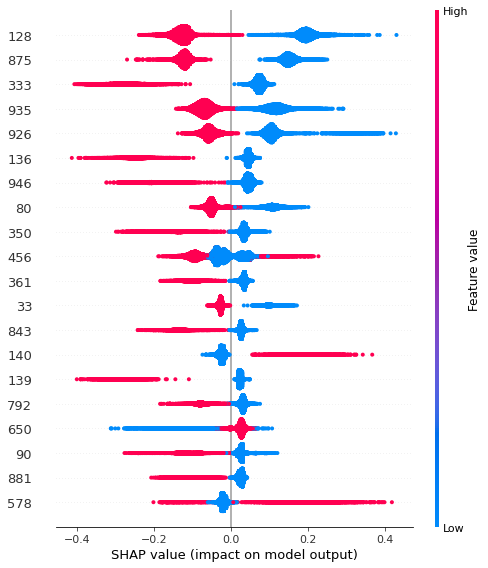

In [27]:
shap.summary_plot(shap_values, X_test)

In [ ]:
#https://github.com/catboost/tutorials/blob/master/model_analysis/prediction_diff_feature_importance_tutorial.ipynb

In [28]:
prediction_diff = model_cb.get_feature_importance(Pool(X_test, label=y_test), type='FeatureImportance', prettified=True)
prediction_diff.head()

,Feature Id,Importances
0,128,2.546496
1,875,1.736553
2,333,1.668654
3,935,1.518307
4,926,1.237330


In [29]:
prediction_diff['Importances'].value_counts()

0.000000    95
0.381133     1
0.098024     1
0.180981     1
0.237704     1
            ..
0.241252     1
0.006662     1
0.047586     1
0.291473     1
0.022757     1
Name: Importances, Length: 930, dtype: int64

In [30]:
prediction_diff

,Feature Id,Importances
0,128,2.546496
1,875,1.736553
2,333,1.668654
3,935,1.518307
4,926,1.237330
...,...,...
1019,975,0.000000
1020,982,0.000000
1021,988,0.000000
1022,1012,0.000000


In [31]:
prediction_diff[:20]

,Feature Id,Importances
0,128,2.546496
1,875,1.736553
2,333,1.668654
3,935,1.518307
4,926,1.237330
5,5,1.181565
6,456,1.106172
7,350,1.058080
8,139,1.042705
9,578,1.024946


In [32]:
prediction_diff[prediction_diff['Importances']>0.01]

,Feature Id,Importances
0,128,2.546496
1,875,1.736553
2,333,1.668654
3,935,1.518307
4,926,1.237330
...,...,...
813,132,0.010267
814,159,0.010258
815,908,0.010185
816,824,0.010117


# DNN part

In [57]:
import torch.utils.data as data

class ANYDataset(data.Dataset):
    def __init__(self, data, labels, infer=False):
        if isinstance(data, pd.DataFrame):
            self.data = data.reset_index(drop=True)
        
        self.labels = labels

        self.data_list = self.data.values.tolist()
        self.label = self.labels.values.tolist()

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):

        return torch.FloatTensor(self.data_list[idx]), self.label[idx]

In [50]:
# select for dropping features according to CatBoost importance
thresh = 0.05
features_len = len([int(x) for x in prediction_diff[prediction_diff['Importances']>thresh]['Feature Id']])
print(f'Number of selected features{features_len}')

#X_train, X_test, y_train, y_test
train_dataset = ANYDataset(X_train[[int(x) for x in prediction_diff[prediction_diff['Importances']>thresh]['Feature Id']]], y_train)
val_dataset = ANYDataset(X_test[[int(x) for x in prediction_diff[prediction_diff['Importances']>thresh]['Feature Id']]], y_test)

#X_train, X_test, y_train, y_test
#if downloaded 'morgan_1024_*'
#train_dataset = ANYDataset(X_train[prediction_diff[prediction_diff['Importances']>thresh]['Feature Id']], y_train)
#val_dataset = ANYDataset(X_test[prediction_diff[prediction_diff['Importances']>thresh]['Feature Id']], y_test)

In [35]:
#select all features

#X_train, X_test, y_train, y_test
features_len = 1024

train_dataset = ANYDataset(X_train, y_train)
val_dataset = ANYDataset(X_test, y_test)

In [58]:
#NN

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Linear, ReLU
import os


class sNN(nn.Module):
    def __init__(self, indim, outdim):
        super(sNN, self).__init__()

        #input, 3 hidden, output

        # Inputs to hidden layer linear transformation
        self.inputl = nn.Linear(indim, 128)
        self.dropout1 = nn.Dropout(p=0.2)
        #Hidden layers
        self.hid1 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(p=0.5)
        self.hid2 = nn.Linear(64, 32)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(32, outdim)

    def forward(self, x):
        # FORWARD
        x = self.inputl(x)
        x = x.relu()
        x = self.dropout1(x)
        x = self.hid1(x)
        x = x.relu()
        x = self.dropout2(x)
        x = self.hid2(x)
        x = x.relu()

        return torch.sigmoid(self.output(x))

# Metrics + utils

In [37]:
# metrics.py

import numpy as np
import sklearn.metrics as metrics
THRESH = 0.2


def auc(y_true, y_scores):
    y_true = y_true.cpu().detach().numpy()
    y_scores = y_scores.cpu().detach().numpy()
    return metrics.roc_auc_score(y_true, y_scores)


def auc_threshold(y_true, y_scores):
    y_true = y_true.cpu().detach().numpy()
    y_scores = y_scores.cpu().detach().numpy()
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_scores)
    return metrics.auc(fpr, tpr)


def get_score_obj(y_true, y_scores, thresh=THRESH):
    y_true = y_true.cpu().detach().numpy()
    y_scores = (y_scores.cpu().detach().numpy() + thresh).astype(np.int16)
    return metrics.classification_report(y_true, y_scores, output_dict=True)


def f1(y_true, y_scores):
    score_obj = get_score_obj(y_true, y_scores)
    return score_obj['weighted avg']['f1-score']

# Metrics for benchmark


def sensitivity(y_true, y_scores, thresh=THRESH):
    y_true = y_true.cpu().detach().numpy()
    y_scores = (y_scores.cpu().detach().numpy() + 1 - thresh).astype(np.int16)
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_scores).ravel()
    return tp / (tp + fn)


def specificity(y_true, y_scores, thresh=THRESH):
    y_true = y_true.cpu().detach().numpy()
    y_scores = (y_scores.cpu().detach().numpy() + 1 - thresh).astype(np.int16)
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_scores).ravel()
    return tn / (tn + fp)


def accuracy(y_true, y_scores, thresh=THRESH):
    y_true = y_true.cpu().detach().numpy()
    y_scores = (y_scores.cpu().detach().numpy() + 1 - thresh).astype(np.int16)
    return metrics.accuracy_score(y_true, y_scores)


def mcc(y_true, y_scores, thresh=THRESH):
    y_true = y_true.cpu().detach().numpy()
    y_scores = (y_scores.cpu().detach().numpy() + 1 - thresh).astype(np.int16)
    return metrics.matthews_corrcoef(y_true, y_scores)

# METRICS FOR CV


def auc_cv(y_true, y_scores):
    return metrics.roc_auc_score(y_true, y_scores)


def get_score_obj_cv(y_true, y_scores, thresh=THRESH):
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    y_scores = (y_scores + 1 - thresh).astype(np.int16)
    return metrics.classification_report(y_true, y_scores, output_dict=True)


def f1_cv(y_true, y_scores):
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    score_obj = get_score_obj_cv(y_true, y_scores)
    return score_obj['weighted avg']['f1-score']


def class1_precision_cv(y_true, y_scores):
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    score_obj = get_score_obj_cv(y_true, y_scores)
    return score_obj['1.0']['precision']


def class1_recall_cv(y_true, y_scores):
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    score_obj = get_score_obj_cv(y_true, y_scores)
    return score_obj['1.0']['recall']


def sensitivity_cv(y_true, y_scores, thresh=THRESH):
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    y_scores = (y_scores + 1 - thresh).astype(np.int16)
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_scores).ravel()
    return tp / (tp + fn)


def specificity_cv(y_true, y_scores, thresh=THRESH):
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    y_scores = (y_scores + 1 - thresh).astype(np.int16)
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_scores).ravel()
    return tn / (tn + fp)


def accuracy_cv(y_true, y_scores, thresh=THRESH):
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    y_scores = (y_scores + 1 - thresh).astype(np.int16)
    return metrics.accuracy_score(y_true, y_scores)


def mcc_cv(y_true, y_scores, thresh=THRESH):
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    y_scores = (y_scores + 1 - thresh).astype(np.int16)
    return metrics.matthews_corrcoef(y_true, y_scores)

In [38]:
#utils.py

import os
import pickle
import torch


def get_max_length(x):
    return len(max(x, key=len))


def pad_sequence(seq):
    def _pad(_it, _max_len):
        return [0] * (_max_len - len(_it)) + _it
    padded = [_pad(it, get_max_length(seq)) for it in seq]
    return padded

def create_dir(dir_name):
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)


def save_pickle(obj, path):
    with open(path, 'wb') as f:
        pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)


def read_pickle(path):
    with open(path, 'rb') as f:
        return pickle.load(f)


def save_model(model, model_dir_path, hash_code):
    if not os.path.exists(model_dir_path):
        os.makedirs(model_dir_path)
    torch.save(model.state_dict(), "{}/model_{}_{}".format(model_dir_path, hash_code, "BEST"))
    print('Save done!')

# Train

In [39]:
!pip install tensorboard_logger

In [40]:
#single_run.py

import argparse
import torch
import torch.nn as nn
import tensorboard_logger
from torch.utils.data import dataloader
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.metrics import precision_recall_curve
plt.switch_backend('agg')
warnings.filterwarnings('ignore')

#saved models
models_path = '/content'

def train_validate_united(train_dataset,
                          val_dataset,
                          features_len,
                          train_device,
                          val_device,
                          opt_type,
                          n_epoch,
                          batch_size,
                          metrics,
                          hash_code,
                          lr):
    train_loader = dataloader.DataLoader(dataset=train_dataset,
                                    batch_size=batch_size,
                                    shuffle=True)

    val_loader = dataloader.DataLoader(dataset=val_dataset,
                                       batch_size=batch_size,
                                       shuffle=False)
    device = 'cuda:0'
    
    #tensorflow_logger fix
    #tensorboard_logger.clean_default_logger()

    try:
        tensorboard_logger.configure('logs/' + hash_code)
    except:
        pass

    criterion = nn.BCELoss()
    model = sNN(features_len, 1).to(device)

    if opt_type == 'sgd':
        opt = optim.SGD(model.parameters(),
                        lr=lr,
                        momentum=0.99)
    elif opt_type == 'adam':
        opt = optim.Adam(model.parameters(),
                         lr=lr)

    min_loss = 100  # arbitary large number
    early_stop_count = 0
    for e in range(n_epoch):
        train_losses = []
        val_losses = []
        train_outputs = []
        val_outputs = []
        train_labels = []
        val_labels = []
        print(e, '--', 'TRAINING ==============>')
        for i, (fp, label) in enumerate(train_loader):
            model.train()
            label = label.float().to(train_device)
            fp = fp.to(train_device)

            # Forward
            opt.zero_grad()
            outputs = model(fp)
            outputs = torch.squeeze(outputs)
            
            loss = criterion(outputs, label)
            train_losses.append(float(loss.item()))
            train_outputs.extend(outputs)
            train_labels.extend(label)

            # Parameters update
            loss.backward()
            opt.step()

        # Validate after each epoch
        print('EPOCH', e, '--', 'VALIDATION ==============>')
        for i, (fp, label) in enumerate(val_loader):
            model.eval()
            label = label.float().to(train_device)
            fp = fp.to(train_device)
            
            with torch.no_grad():
                outputs = model(fp)
                outputs = torch.squeeze(outputs)
                
                loss = criterion(outputs, label)
                val_losses.append(float(loss.item()))
                val_outputs.extend(outputs)
                val_labels.extend(label)

        train_outputs = torch.stack(train_outputs)
        val_outputs = torch.stack(val_outputs)
        train_labels = torch.stack(train_labels)
        val_labels = torch.stack(val_labels)
        tensorboard_logger.log_value('train_loss', sum(train_losses) / len(train_losses), e + 1)
        tensorboard_logger.log_value('val_loss', sum(val_losses) / len(val_losses), e + 1)
        print('{"metric": "train_loss", "value": %f, "epoch": %d}' % (sum(train_losses) / len(train_losses), e + 1))
        print('{"metric": "val_loss", "value": %f, "epoch": %d}' % (sum(val_losses) / len(val_losses), e + 1))
        for key in metrics.keys():
            train_metric = metrics[key](train_labels, train_outputs)
            val_metric = metrics[key](val_labels, val_outputs)
            print('{"metric": "%s", "value": %f, "epoch": %d}' % ('train_' + key, train_metric, e + 1))
            print('{"metric": "%s", "value": %f, "epoch": %d}' % ('val_' + key, val_metric, e + 1))
            tensorboard_logger.log_value('train_{}'.format(key),
                                         train_metric, e + 1)
            tensorboard_logger.log_value('val_{}'.format(key),
                                         val_metric, e + 1)
        loss_epoch = sum(val_losses) / len(val_losses)
        if loss_epoch < min_loss:
            early_stop_count = 0
            min_loss = loss_epoch
            save_model(model, models_path, hash_code)
        else:
            early_stop_count += 1
            if early_stop_count > 30:
                print('Traning can not improve from epoch {}\tBest loss: {}'.format(e, min_loss))
                break

    train_metrics = {}
    val_metrics = {}
    for key in metrics.keys():
        train_metrics[key] = metrics[key](train_labels, train_outputs)
        val_metrics[key] = metrics[key](val_labels, val_outputs)

    return train_metrics, val_metrics


def predict(dataset, model_path, device='cpu'):
    loader = dataloader.DataLoader(dataset=val_dataset,
                                       batch_size=batch_size,
                                       shuffle=False)
    model = sNN(features_len, 1).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    # EVAL_MODE
    model.eval()
    probas = []
    for i, (fp, label) in enumerate(loader):
        with torch.no_grad():
            fp = fp.to(device)
            # Forward to get smiles and equivalent weights
            proba = model(fp).cpu()
            probas.append(proba)
    print('Forward done !!!')
    probas = np.concatenate(probas)
    return probas


def plot_roc_curve(y_true, y_pred, hashcode=''):

    if not os.path.exists('vis/'):
        os.makedirs('vis/')

    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=1)
    auc_roc = metrics.roc_auc_score(y_true, y_pred)
    print('AUC: {:4f}'.format(auc_roc))
    plt.plot(fpr, tpr)
    plt.savefig('vis/ROC_{}'.format(hashcode + '.png'))
    plt.clf()  # Clear figure


def plot_precision_recall(y_true, y_pred, hashcode=''):

    if not os.path.exists('vis/'):
        os.makedirs('vis/')

    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred)
    plt.plot(thresholds, precisions[:-1], label="Precision")
    plt.plot(thresholds, recalls[:-1], label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.savefig('vis/PR_{}'.format(hashcode + '.png'))
    plt.clf()  # Clear figure


if torch.cuda.is_available():
    train_device = 'cuda'
    val_device = 'cuda'
else:
    train_device = 'cpu'
    val_device = 'cpu'

In [53]:
#Hashcode for tf.events
hashcode = 'TEST'

train_validate_united(train_dataset,
                      val_dataset,
                      features_len,
                      train_device,
                      val_device,
                      'adam', #Optimizer adam ('adam') or sgd ('sgd')
                      int(500), #Number of epochs
                      int(128), #Batch size
                      {'sensitivity': sensitivity, 'specificity': specificity,
                        'accuracy': accuracy, 'mcc': mcc, 'auc': auc},
                      hashcode, #Hashcode for tf.events
                      1e-4) #Learning rate

0 -- TRAINING ==============>
EPOCH 0 -- VALIDATION ==============>
{"metric": "train_loss", "value": 0.547873, "epoch": 1}
{"metric": "val_loss", "value": 0.504300, "epoch": 1}
{"metric": "train_sensitivity", "value": 0.878069, "epoch": 1}
{"metric": "val_sensitivity", "value": 0.836897, "epoch": 1}
{"metric": "train_specificity", "value": 0.277470, "epoch": 1}
{"metric": "val_specificity", "value": 0.451963, "epoch": 1}
{"metric": "train_accuracy", "value": 0.422426, "epoch": 1}
{"metric": "val_accuracy", "value": 0.543968, "epoch": 1}
{"metric": "train_mcc", "value": 0.155854, "epoch": 1}
{"metric": "val_mcc", "value": 0.253433, "epoch": 1}
{"metric": "train_auc", "value": 0.603879, "epoch": 1}
{"metric": "val_auc", "value": 0.723928, "epoch": 1}
Save done!
1 -- TRAINING ==============>
EPOCH 1 -- VALIDATION ==============>
{"metric": "train_loss", "value": 0.497150, "epoch": 2}
{"metric": "val_loss", "value": 0.484648, "epoch": 2}
{"metric": "train_sensitivity", "value": 0.814836, 

({'accuracy': 0.8606767575681762,
  'auc': 0.9476153192847909,
  'mcc': 0.6818862033893514,
  'sensitivity': 0.9061224489795918,
  'specificity': 0.8462188511243481},
 {'accuracy': 0.7536825396825397,
  'auc': 0.7950190111896343,
  'mcc': 0.3935554701311729,
  'sensitivity': 0.6372692256607784,
  'specificity': 0.7902465479120604})

In [ ]:
!pip install torch torchvision

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs